In [ ]:
import random
s="Wael,Thanuja,Samir,Abdou Akim,Yasmine,Mouhamadou,Kea,Benjamin,Hicham,Tala,CHARLES DORIAN,Zeinaba,Zakaria,Flaude,Mounif Aladé,Asser,Mehdi,Said,Abderrahmane,Vincent,Mariem,Arthur,Akram,Harold Teddy,Amine,Anass,Alexandra,Walid,CHRISTELLE,Jordan,Oubey,Osman,Hugo,Sabina,Shaza,Marouene,Bizang,Yassine"
random.choice(s.split(','))

'Yasmine'

### Extraction d'information issue d'une analyse de commentaires

    1) Chargement dataset
    2) Macro Nettoyage dataset (duplicats, filtre sur longueur de commentaires, separation positif/negatif...)
    3) Nettoyage specifique du texte (normaliser(minuscule,accents,ponctuation), stop_words, caracteres speciaux
    4) Featurisation des textes via TF-IDF (avec 3-grams)
    5) Extraction par commentaire des combinaisons de mots ayant les meilleurs scores (==> definir un seuil de bon score)
    6) Construction d'une viz pour avoir acces à ces renseignements (wordcloud)
    
    

#### Librairies

In [ ]:
import pandas as pd

#### Chargement des données

In [ ]:
df=pd.read_csv('reviews_hotels.csv')
del df['Unnamed: 0']
df.drop_duplicates(inplace=True)

FileNotFoundError: ignored

#### Macro nettoyage

In [ ]:
df['len']=df['review'].apply(lambda x: len(x.split()))
df=df[df['len']>30]

df.shape

(50126, 4)

In [ ]:
df['rating'].value_counts()

0    37831
1    12295
Name: rating, dtype: int64

In [ ]:
pos=df[df['rating']<1]
neg=df[df['rating']>0]

#### Nettoyage specifique

In [ ]:
from unidecode import unidecode
import re

p="[a-z]{1,}"

with open("stop-w_fr.txt") as f:
    sw=f.readlines()
sw=list(set([unidecode(el.strip()).lower() for el in sw]))
sw.remove('pas')
sw.remove('n')
sw.remove('ne')
sw.remove('tres')
sw.remove('trop')


In [ ]:
def nett(texte):
    final=''
    texte=unidecode(texte.strip()).lower()
    for elem in re.findall(p,texte):
        if elem in sw:
            continue
        else:
            final=final+' '+elem
    return final

df['review'].loc[0],nett(df['review'].loc[0])

('Appi hôtel à éviter absolument. Chambre pas faite à 6 heures du soir après être partis toute la journée ( explication du personnel : « il fallait préciser que la chambre devait être faite »)pas de service petits déjeuner, rien pour accrocher les serviettes de bain pas de verre pour brosses à dents manque de cintres malgré ma demande le tout pour 90€ c’est surréaliste À déconseiller sauf à son pire ennemi. J.L. Maurin séjour du 19 au 21 octobre 2018',
 ' appi hotel eviter chambre pas faite heures soir partis journee explication personnel fallait preciser chambre devait faite pas service petits dejeuner accrocher serviettes bain pas verre brosses dents manque cintres demande eur surrealiste deconseiller ennemi maurin sejour octobre')

In [ ]:
negatif=neg['review'].sample(1000).apply(nett)
positif=pos['review'].sample(1000).apply(nett)

#### Featurisation des textes via TF-IDF (avec 3-grams)

1) Negatif

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(4,5))
vectorizer.fit(negatif)
X = vectorizer.transform(negatif)

In [ ]:
N=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
seuil=0.15
finalm=[]
finals=[]

for i in N.index:
    n=5
    tmp=N.loc[i]
    mf=[]
    sf=[]
    while n > 0 :
        m=tmp.idxmax(axis=1)
        s=tmp[tmp.idxmax(axis=1)]
        if s > seuil :
            mf=mf+[m.replace(' ','_')]
            sf=sf+[s]
            del tmp[m]
            n=n-1
        else:
            break
        
    finalm.append(mf)
    finals.append(sf)

In [ ]:
# Via numpy  continuer

seuil=0.15
finalm=[]
finals=[]

for i in N.index[:10]:
    n=5
    tmp=N.loc[i].values
    mf=[]
    sf=[]
    m=np.argwhere(tmp>seuil)
    
    ###
    finalm.append(m)


In [ ]:
f=[' '.join(elem) for elem in finalm if len(elem) > 0]

#### Wordcloud

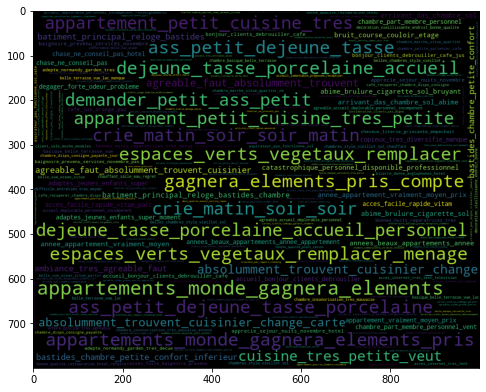

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
                    width=1000,
                    height=800,
                    stopwords = set(STOPWORDS),
                    ).generate(' '.join(f))
plt.figure(figsize= (8, 8), facecolor= None)
plt.imshow(wordcloud);

2) Positif

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(3,4))
vectorizer.fit(negatif)
X = vectorizer.transform(positif)

In [ ]:
N=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())

In [ ]:
seuil=0.15
finalm=[]
finals=[]

for i in N.index:
    n=5
    tmp=N.loc[i]
    mf=[]
    sf=[]
    while n > 0 :
        m=tmp.idxmax(axis=1)
        s=tmp[tmp.idxmax(axis=1)]
        if s > seuil :
            mf=mf+[m.replace(' ','_')]
            sf=sf+[s]
            del tmp[m]
            n=n-1
        else:
            break
        
    finalm.append(mf)
    finals.append(sf)

In [ ]:
f=[' '.join(elem) for elem in finalm if len(elem) > 0]

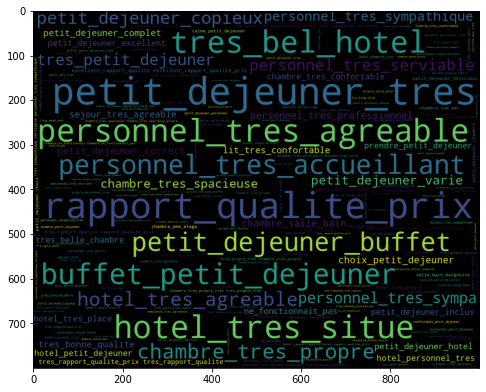

In [ ]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(
                    width=1000,
                    height=800,
                    stopwords = set(STOPWORDS),
                    ).generate(' '.join(f))
plt.figure(figsize= (8, 8), facecolor= None)
plt.imshow(wordcloud);